In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [16]:
ds=pd.read_csv('Groceries_TS_And_ARM_dataset.csv',parse_dates=['Date'])
ds.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_11688\1510106829.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ds=pd.read_csv('Groceries_TS_And_ARM_dataset.csv',parse_dates=['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [43]:
row_selection = ds.iloc[0]
row_selection 


Member_number                     1808
Date               2015-07-21 00:00:00
itemDescription         tropical fruit
year                              2015
month                                7
day                                 21
day_of_week                    Tuesday
Name: 0, dtype: object

In [17]:
ds['year'] = ds['Date'].dt.year
ds['month'] = ds['Date'].dt.month
ds['day'] = ds['Date'].dt.day
ds['day_of_week'] = ds['Date'].dt.day_name()
ds.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday


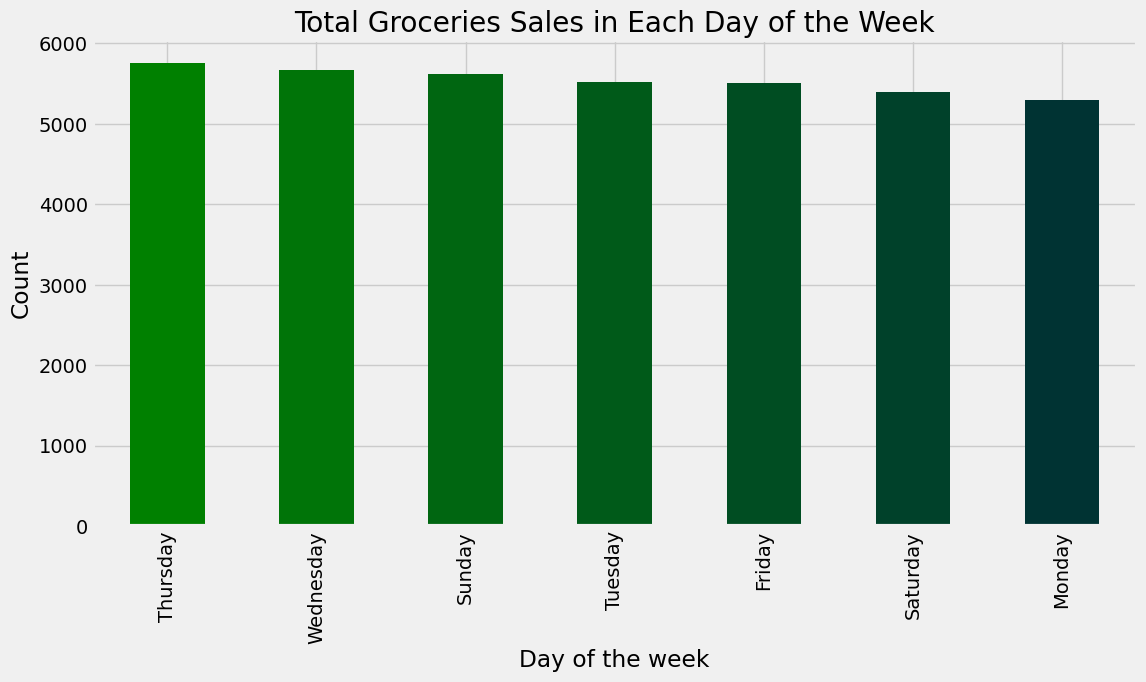

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

ds['day_of_week'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Day of the Week').set(xlabel='Day of the week', ylabel='Count');

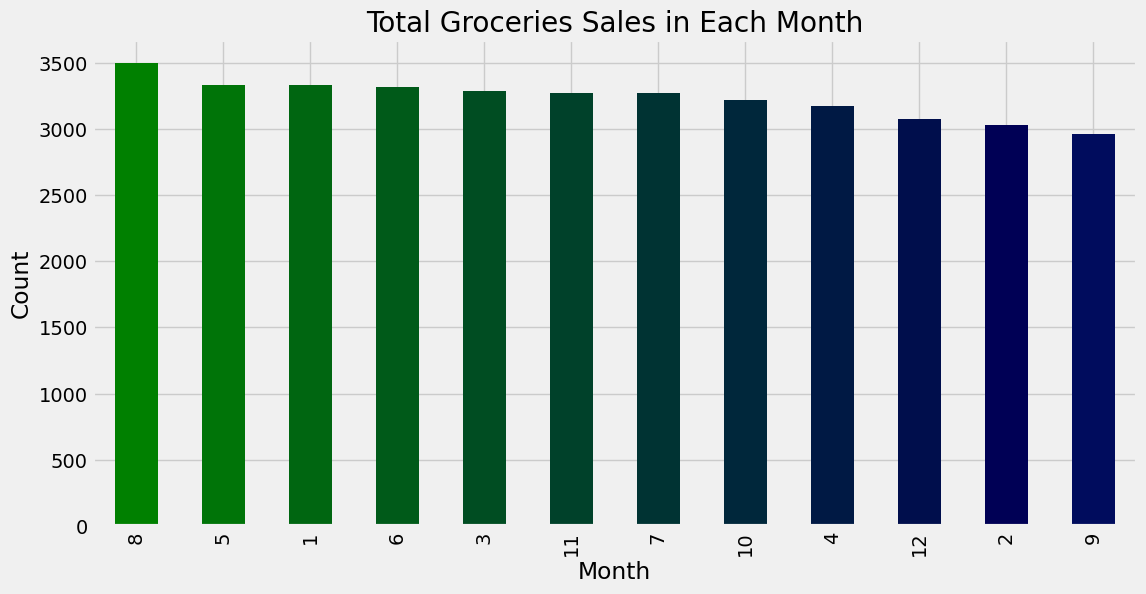

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

ds['month'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Month').set(xlabel='Month', ylabel='Count');

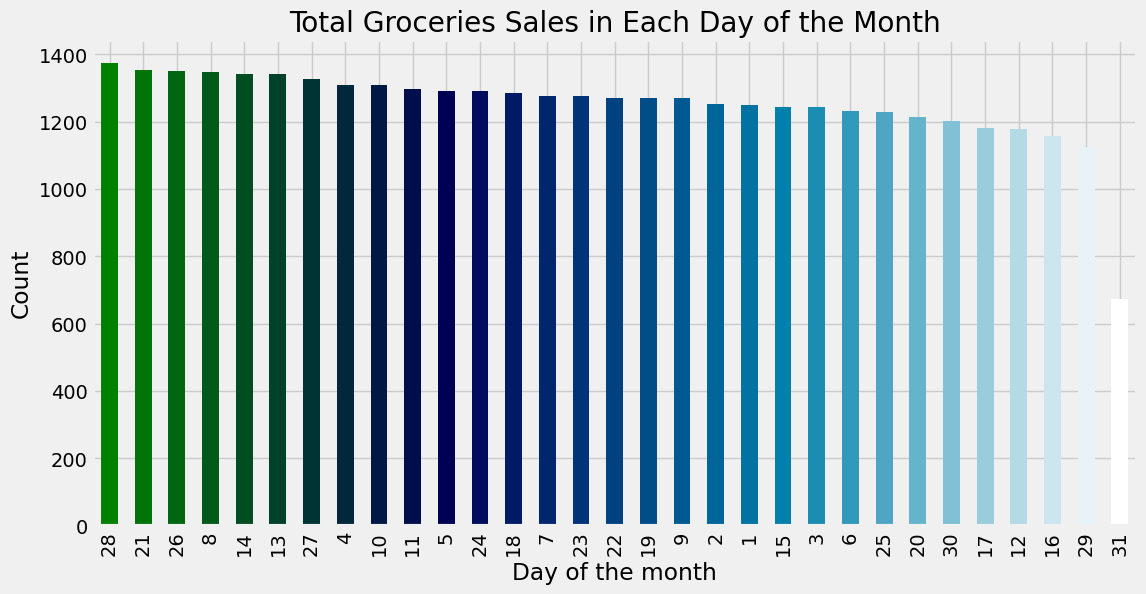

In [23]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

ds['day'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Day of the Month').set(xlabel='Day of the month', ylabel='Count');

In [25]:
groceries_time = pd.DataFrame(ds.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = ds.groupby('Date')['Member_number'].nunique().values
groceries_time['items_count'] = ds.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = ds.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."


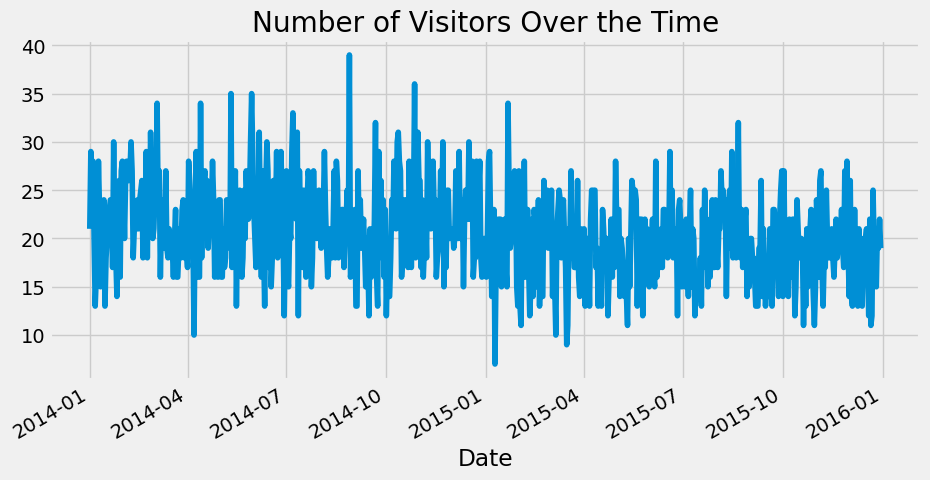

In [26]:
groceries_time['members_count'].plot(figsize=(10, 5),title='Number of Visitors Over the Time');

In [27]:
!pip install apyori

In [28]:
from apyori import apriori

In [29]:
transactions = groceries_time['items'].tolist()

In [30]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [31]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333
